In [2]:
import xgboost as xgb

In [5]:
from sklearn import ensemble, metrics, model_selection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
bioresponce = pd.read_csv('./bioresponse.csv', header=0)

In [9]:
bioresponce_target = bioresponce.Activity.values
bioresponce_data = bioresponce.iloc[:,1:]

In [11]:
n_trees = [1]+np.arange(10,55,5)

In [23]:
scores=[]
for n_tree in n_trees:
    clf = ensemble.RandomForestClassifier(n_estimators=n_tree, min_samples_split=5)
    score = model_selection.cross_val_score(clf, bioresponce_data, bioresponce_target, cv=3, scoring='accuracy')
    scores.append(score.mean())

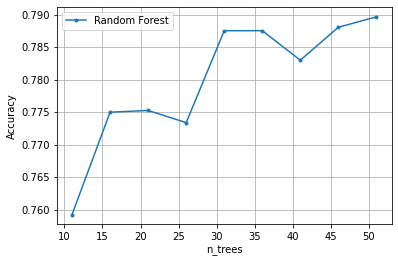

In [21]:
plt.plot(n_trees, scores, marker='.', label='Random Forest')
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('n_trees')
plt.legend()

### XGboost

In [24]:
xgb_scores=[]
for n_tree in n_trees:
    xgb_clf = xgb.XGBClassifier(learning_rate=.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = model_selection.cross_val_score(xgb_clf, bioresponce_data, bioresponce_target, cv=3, scoring='accuracy')
    xgb_scores.append(score.mean())

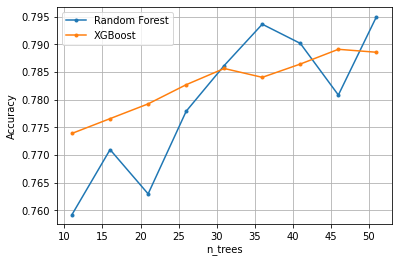

In [25]:
plt.plot(n_trees, scores, marker='.', label='Random Forest')
plt.plot(n_trees, xgb_scores, marker='.', label='XGBoost')
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('n_trees')
plt.legend()

# Homework Gradient Boosting

In [39]:
from sklearn import datasets, tree

In [28]:
df = datasets.load_boston()

In [29]:
X = df.data
y = df.target

In [33]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.25)

In [35]:
def L_derivate(y,z):
    return y-z

In [43]:
base_algorithms_list = []
coefficients_list = [0.9]

In [69]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo,
                 coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [70]:
b = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
b.fit(train_X, train_y)
base_algorithms_list.append(b)

In [87]:
base_algorithms_list = []
coefficients_list = [0.9]
b = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
b.fit(train_X, train_y)
base_algorithms_list.append(b)
for i in range(10):
    b = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    b.fit(train_X, L_derivate(train_y, gbm_predict(train_X)))
    base_algorithms_list.append(b)
    coefficients_list.append(0.9/(1.0+i))
metrics.mean_squared_error(test_y, gbm_predict(test_X))**0.5

5.2861322283281575

In [85]:
res_3 = metrics.mean_squared_error(test_y, gbm_predict(test_X))**0.5
with open('answer_3.txt', 'w') as f:
    f.write(str(res_3))
    

In [86]:
!cat answer_3.txt

5.2872884375699485

Task 4 

In [117]:
iterations = np.arange(1,101,5)
print(iterations)

[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]


In [121]:
scoring=[]
iterations = np.arange(1,201,5)
for iteration in iterations:
    xgb_reg = xgb.XGBRegressor(n_estimators=iteration)
    xgb_reg.fit(train_X, train_y)
    scoring.append(metrics.mean_squared_error(test_y, xgb_reg.predict(test_X)))

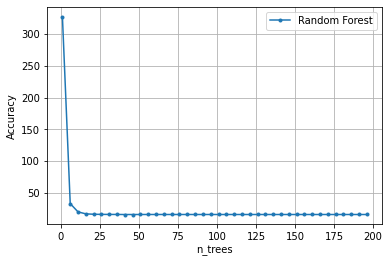

In [123]:
plt.plot(iterations, scoring, marker='.', label='Random Forest')
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('n_trees')
plt.legend()

In [129]:
#max depth
scoring=[]
depth = np.arange(1,40,1)
for iteration in depth:
    xgb_reg = xgb.XGBRegressor(max_depth=iteration)
    xgb_reg.fit(train_X, train_y)
    scoring.append(metrics.mean_squared_error(test_y, xgb_reg.predict(test_X)))

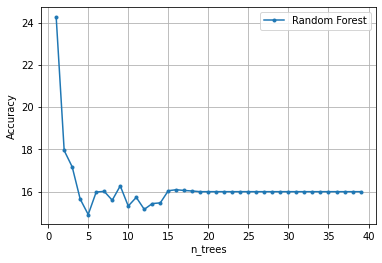

In [130]:
plt.plot(depth, scoring, marker='.', label='Random Forest')
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('n_trees')
plt.legend()

In [167]:
!echo "2 3" > answer_4.txt

In [168]:
!cat answer_4.txt

2 3


In [132]:
from sklearn import linear_model

In [144]:
int(len(X)*0.75)

379

In [163]:
X_train = X[:int(len(X)*0.75), :]
X_test = X[-(len(X)-int(len(X)*0.75)):, :]
y_train = y[:int(len(X)*0.75)]
y_test = y[-(len(X)-int(len(X)*0.75)):]

In [161]:
X_test.shape[0]+X_train.shape[0]

506

In [151]:
X_train.shape

(13,)

In [164]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

res_5 = metrics.mean_squared_error(y_test, lin_reg.predict(X_test))**0.5
print(res_5)

8.254979753549401


In [165]:
with open('answer_5.txt', 'w') as f:
    f.write(str(res_5))
    